In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dabeet","key":"855889030ebb2b730b66baa806bf3c39"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vishesh1412/celebrity-face-image-dataset

Dataset URL: https://www.kaggle.com/datasets/vishesh1412/celebrity-face-image-dataset
License(s): CC0-1.0
100% 52.9M/52.9M [00:02<00:00, 41.2MB/s]
100% 52.9M/52.9M [00:02<00:00, 27.2MB/s]


In [ ]:
!unzip celebrity-face-image-dataset.zip -d /content/dataset

Archive:  celebrity-face-image-dataset.zip
  inflating: /content/dataset/Celebrity Faces Dataset/Angelina Jolie/001_fe3347c0.jpg  
  inflating: /content/dataset/Celebrity Faces Dataset/Angelina Jolie/002_8f8da10e.jpg  
  inflating: /content/dataset/Celebrity Faces Dataset/Angelina Jolie/003_57612506.jpg  
  inflating: /content/dataset/Celebrity Faces Dataset/Angelina Jolie/004_f61e7d0c.jpg  
  inflating: /content/dataset/Celebrity Faces Dataset/Angelina Jolie/005_582c121a.jpg  
  inflating: /content/dataset/Celebrity Faces Dataset/Angelina Jolie/006_9135205d.jpg  
  inflating: /content/dataset/Celebrity Faces Dataset/Angelina Jolie/007_cabbfcbb.jpg  
  inflating: /content/dataset/Celebrity Faces Dataset/Angelina Jolie/008_d1f87068.jpg  
  inflating: /content/dataset/Celebrity Faces Dataset/Angelina Jolie/009_fb3e6174.jpg  
  inflating: /content/dataset/Celebrity Faces Dataset/Angelina Jolie/010_f99d79e3.jpg  
  inflating: /content/dataset/Celebrity Faces Dataset/Angelina Jolie/011_7344

In [ ]:
!ls /content/dataset

'Celebrity Faces Dataset'


In [ ]:
import os
current = "/content/dataset/Celebrity Faces Dataset"
new = "/content/dataset/images"
os.rename(current,new)

In [ ]:
!ls /content/dataset/images

'Angelina Jolie'     'Jennifer Lawrence'  'Megan Fox'	      'Sandra Bullock'	    'Will Smith'
'Brad Pitt'	     'Johnny Depp'	  'Natalie Portman'   'Scarlett Johansson'
'Denzel Washington'  'Kate Winslet'	  'Nicole Kidman'     'Tom Cruise'
'Hugh Jackman'	     'Leonardo DiCaprio'  'Robert Downey Jr'  'Tom Hanks'


In [ ]:
import shutil

images_dir = "/content/dataset/images"

folders_to_keep = [
    "Angelina Jolie",
    "Leonardo DiCaprio",
    "Megan Fox",
    "Robert Downey Jr",
    "Tom Cruise"
]

for folder_name in os.listdir(images_dir):
    folder_path = os.path.join(images_dir, folder_name)
    if os.path.isdir(folder_path) and folder_name not in folders_to_keep:
        shutil.rmtree(folder_path)
        print(f"Deleted: {folder_name}")

print("Cleanup complete. Only specified folders are retained.")

In [ ]:
!ls /content/dataset/images

'Angelina Jolie'  'Leonardo DiCaprio'  'Megan Fox'  'Robert Downey Jr'	'Tom Cruise'


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
dataset_path = '/content/dataset/images'

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size = (224,224),
    batch_size = 16,
    label_mode = 'int',
    shuffle = True,
    seed = 123
)

class_names = train_dataset.class_names


validation_split = 0.2
train_dataset = train_dataset.take(int(len(train_dataset)*(1-validation_split)))
validation_dataset = train_dataset.skip(int(len(train_dataset)*(1-validation_split)))

Found 500 files belonging to 5 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(64,(3,3),activation="relu",input_shape=(224,224,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(5,activation="softmax")
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 788544)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │     100,933,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,936,197 (385.04 MB)

 Trainable params: 100,936,197 (385.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.0001,
    beta_1 = 0.95
)

model.compile(
    optimizer = adam_optimizer,
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
early_stopping = EarlyStopping(
    monitor = "val_accuracy",
    patience = 5,
    restore_best_weights = True
)

history = model.fit(
    train_dataset,
    epochs = 14,
    validation_data = validation_dataset,
    callbacks= [early_stopping]
)

Epoch 1/14
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.2233 - loss: 1578.9977 - val_accuracy: 0.3125 - val_loss: 503.0236
Epoch 2/14
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.3502 - loss: 419.7190 - val_accuracy: 0.3500 - val_loss: 162.8802
Epoch 3/14
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.4467 - loss: 95.4795 - val_accuracy: 0.5625 - val_loss: 72.5666
Epoch 4/14
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.6216 - loss: 44.9530 - val_accuracy: 0.6375 - val_loss: 24.5819
Epoch 5/14
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7666 - loss: 14.3417 - val_accuracy: 0.8250 - val_loss: 8.1960
Epoch 6/14
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.8821 - loss: 4.1964 - val_accuracy: 0.8250 - val_loss: 6.0830
Epoch 7/14
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9306 - loss: 2.3597 - val_accuracy: 0.7750 - val_loss: 12.3772
Epoch 8/14
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9034 - loss: 1.8284 - val_ac

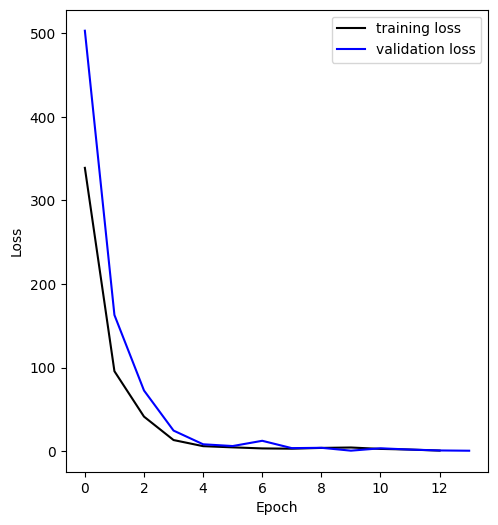

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
cleaned_loss = train_loss[1:]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(cleaned_loss,label="training loss",color="black")
plt.plot(val_loss,label="validation loss",color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

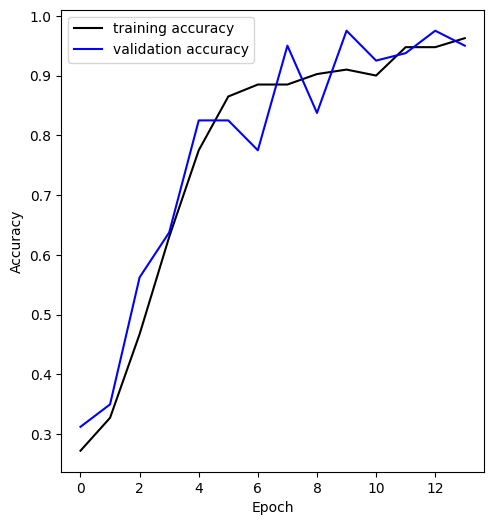

In [ ]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(train_accuracy,label="training accuracy",color="black")
plt.plot(validation_accuracy,label="validation accuracy",color="blue")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
actual = []
predicted = []

for images,labels in validation_dataset:
  actual.extend(labels.numpy())
  predicted.extend(model.predict(images).argmax(axis=1))

actual = np.array(actual)
predicted = np.array(predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


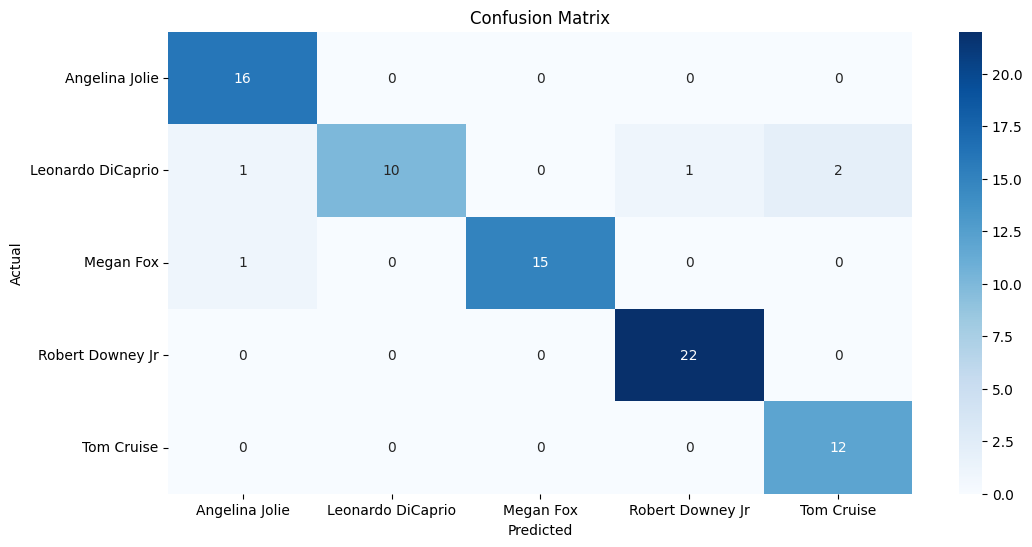

In [ ]:
cm = confusion_matrix(actual,predicted)

plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()